Install Datasets and Upgrade TensorFlow

In [1]:
%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tfds-nightly --user
%pip --no-cache-dir install --upgrade tensorflow --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 167.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import resources and check

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import json

import tensorflow_hub as hub


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Check GPU

In [4]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.11.0
	• tf.keras version: 2.11.0
	• Running on GPU


Load dataset

In [5]:
data, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQXWY34/oxford_flowers102-train.tfrecord*…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQXWY34/oxford_flowers102-test.tfrecord*.…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQXWY34/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


Load to dataset

In [6]:
training_set, validation_set, test_set = data['train'], data['test'], data['validation']


Check dataset info

In [7]:
dataset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

Explore Dataset

In [8]:
num_examples_train = dataset_info.splits['train'].num_examples
num_examples_test = dataset_info.splits['test'].num_examples
num_examples_valid = dataset_info.splits['validation'].num_examples

total_num_examples = np.sum([num_examples_train, num_examples_test,num_examples_valid])

# TODO: Get the number of classes in the dataset from the dataset info.

num_classes = dataset_info.features['label'].num_classes

print(total_num_examples)

print(num_classes)

8189
102


Print the shape and corresponding label of 3 images in the training set.

In [9]:
for image, label in training_set.take(3):
    print('The images in the training set have:\n\u2022 shape:', image.shape, '\n\u2022 label:', label.numpy())

The images in the training set have:
• shape: (500, 667, 3) 
• label: 72
The images in the training set have:
• shape: (500, 666, 3) 
• label: 84
The images in the training set have:
• shape: (670, 500, 3) 
• label: 70


Label Mapping

In [10]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
    
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

Plot sample from dataset

In [11]:
for image, label in training_set.take(3):
    image = image.numpy()
    label = label.numpy()


print('The label of this image is:', label)


print('The class name of this image is:', class_names[str(label)])

The label of this image is: 70
The class name of this image is: tree poppy


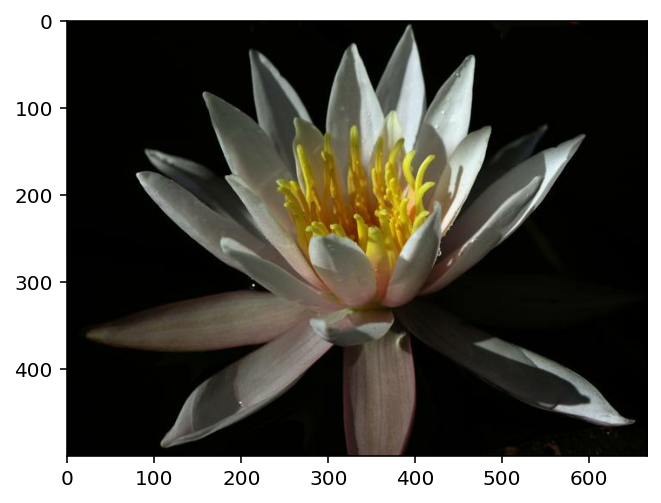

The label of this image is: 72
The class name of this image is: azalea


In [12]:
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

plt.imshow(image)
plt.show()

print('The label of this image is:', label)
print('The class name of this image is:', class_names[str(label)])

Create pipline

In [13]:
batch_size = 32
image_size = 224


                


def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size), method= tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

training_batches = training_set.shuffle(num_examples_train//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

Build and Train the Classifier

In [14]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))

In [15]:
feature_extractor.trainable = False

V1


In [16]:
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(102, activation = 'softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])





EPOCHS = 35

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(training_batches, 
                    epochs=EPOCHS, 
                    validation_data=validation_batches)

Epoch 1/35
32/32 [==============================] - 17s 181ms/step - loss: 5.0683 - accuracy: 0.0147 - val_loss: 4.6416 - val_accuracy: 0.0353
Epoch 2/35
32/32 [==============================] - 5s 144ms/step - loss: 4.1235 - accuracy: 0.1049 - val_loss: 4.1946 - val_accuracy: 0.0964
Epoch 3/35
32/32 [==============================] - 5s 144ms/step - loss: 3.6195 - accuracy: 0.2294 - val_loss: 4.0240 - val_accuracy: 0.1293
Epoch 4/35
32/32 [==============================] - 5s 148ms/step - loss: 3.2142 - accuracy: 0.3363 - val_loss: 3.8612 - val_accuracy: 0.1621
Epoch 5/35
32/32 [==============================] - 5s 144ms/step - loss: 2.9021 - accuracy: 0.4147 - val_loss: 3.7875 - val_accuracy: 0.1745
Epoch 6/35
32/32 [==============================] - 4s 139ms/step - loss: 2.6300 - accuracy: 0.4990 - val_loss: 3.6881 - val_accuracy: 0.1898
Epoch 7/35
32/32 [==============================] - 5s 148ms/step - loss: 2.4144 - accuracy: 0.5647 - val_loss: 3.6195 - val_accuracy: 0.2082
Epoch

Build and train network

Check and Validate accuracy

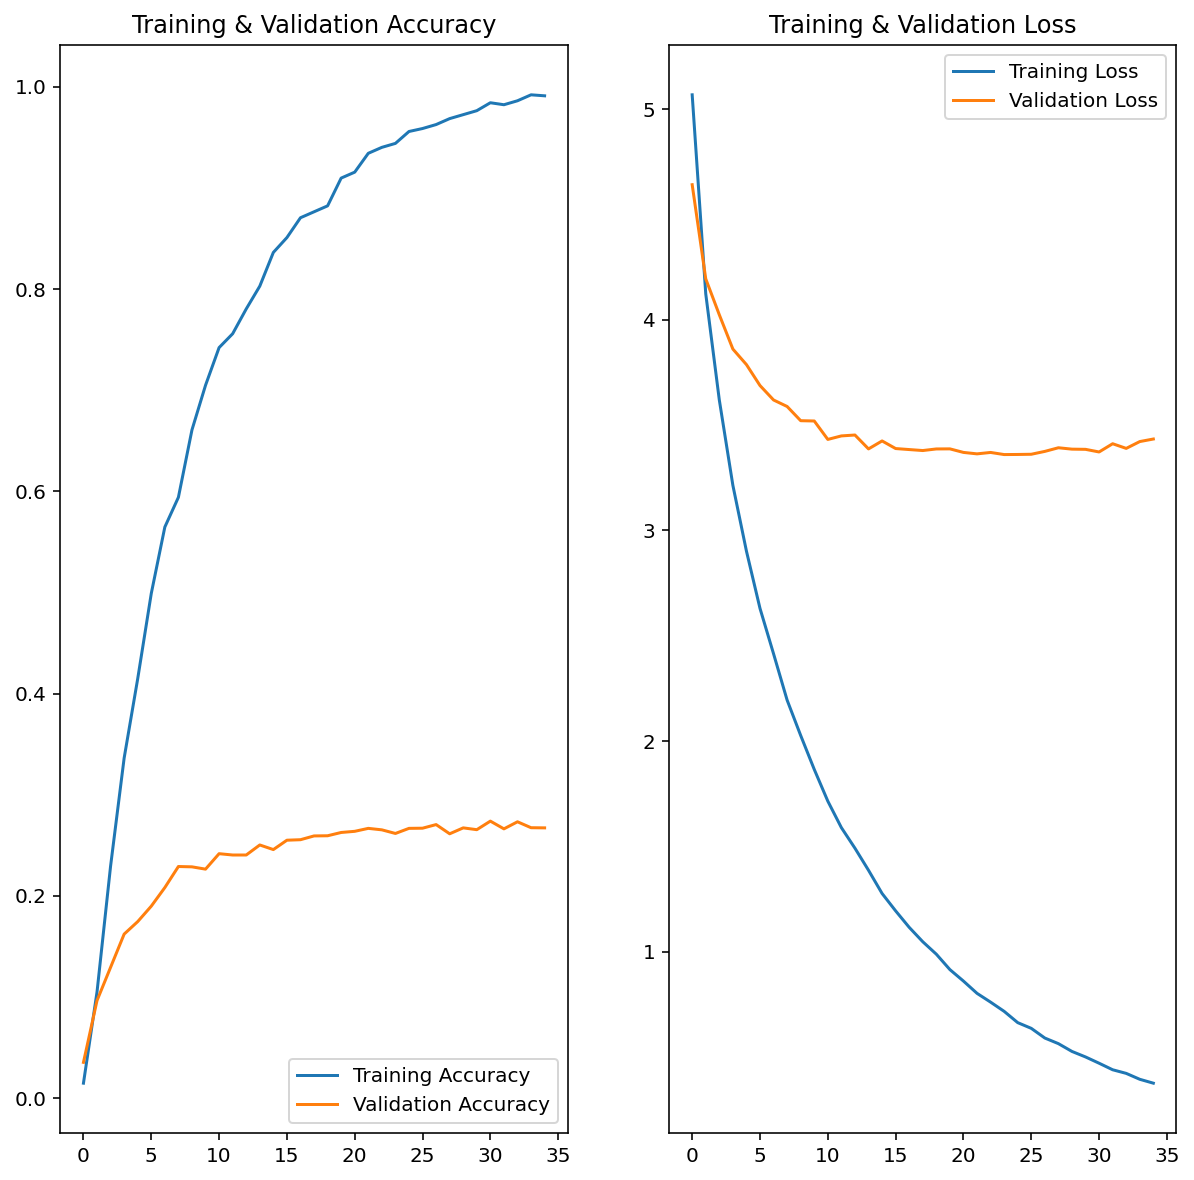

In [18]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()


Network Test - Print the loss and accuracy values achieved on the entire test set.

In [19]:
loss, accuracy = model.evaluate(testing_batches)

print('Loss on Testing dataset: {:,.3f}'.format(loss))
print('Accuracy on Training dataset: {:.3%}'.format(accuracy))

32/32 [==============================] - 1s 24ms/step - loss: 3.2733 - accuracy: 0.2971
Loss on Testing dataset: 3.273
Accuracy on Training dataset: 29.706%


Save the Model

In [20]:
model_filepath = './model_v1.h5'
model.save(model_filepath)

Load model

In [21]:
model_filepath = './model_v1.h5'
reloaded_model = tf.keras.models.load_model(model_filepath, custom_objects={'KerasLayer':hub.KerasLayer})

reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


Image Pre-processing

In [22]:
image_size = 224

def process_image(image):
    tf_image = tf.convert_to_tensor(image)
    tf_image = tf.image.resize(image, (image_size, image_size))
    tf_image /= 255
    image = tf_image.numpy()
    return image


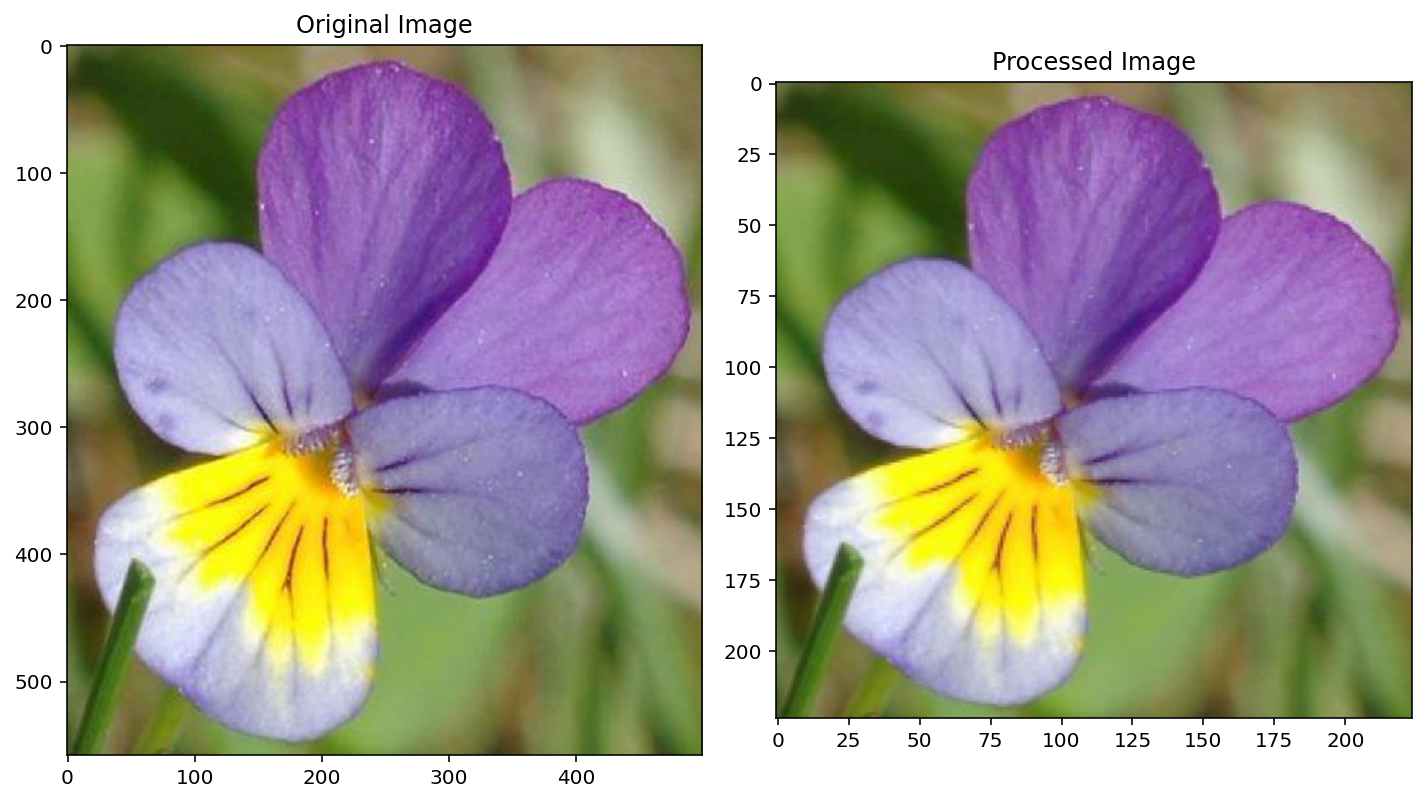

In [24]:
from PIL import Image

image_path = './test_images/wild_pansy.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Inference

In [25]:
def predict(image_path, model, top_k):
    img = np.asarray(Image.open(image_path))
    img = tf.convert_to_tensor(img)
    img, label = format_image(img, 0)
    img_batch = tf.reshape(img, [1, image_size, image_size, 3])
    probs = model.predict(img_batch)
    probs = probs.flatten()    
    ps, classes = tf.math.top_k(probs, k=top_k, sorted=True)
    ps = ps.numpy()
    classes = classes.numpy()
   
    return ps, classes, img

In [26]:
image_path = './test_images/wild_pansy.jpg'
ps, classes, img = predict(image_path, reloaded_model, 5)
print(ps, type(ps[0]))
print(classes, type(classes[0]))

1/1 [==============================] - 1s 623ms/step
[0.41189653 0.0583382  0.05787613 0.05787546 0.04976427] <class 'numpy.float32'>
[18  2 35 67 77] <class 'numpy.int32'>


Sanity Check

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


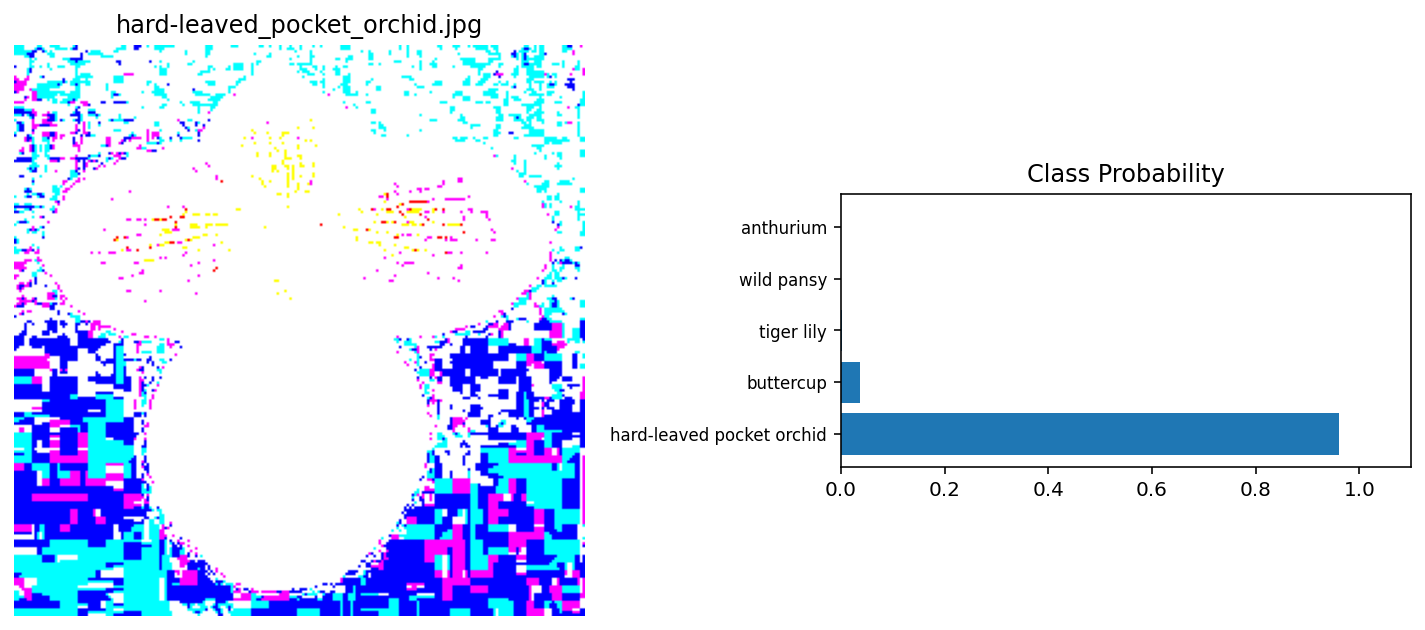

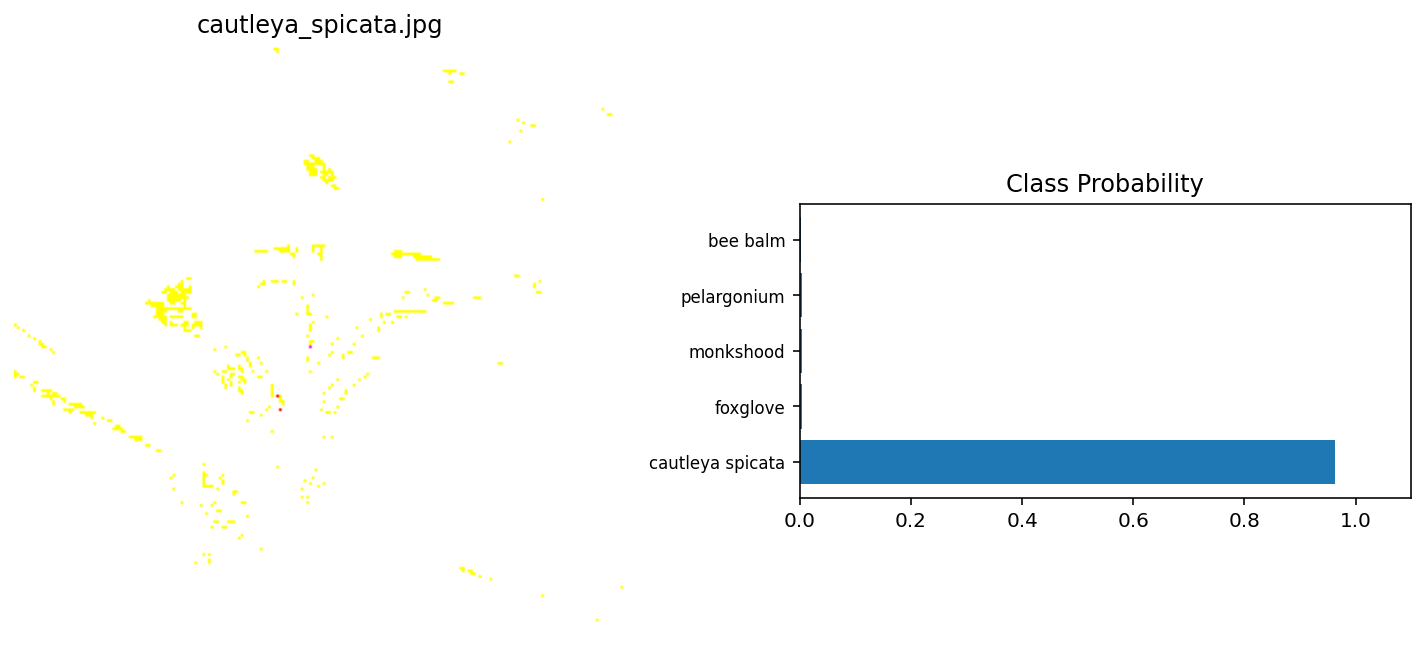

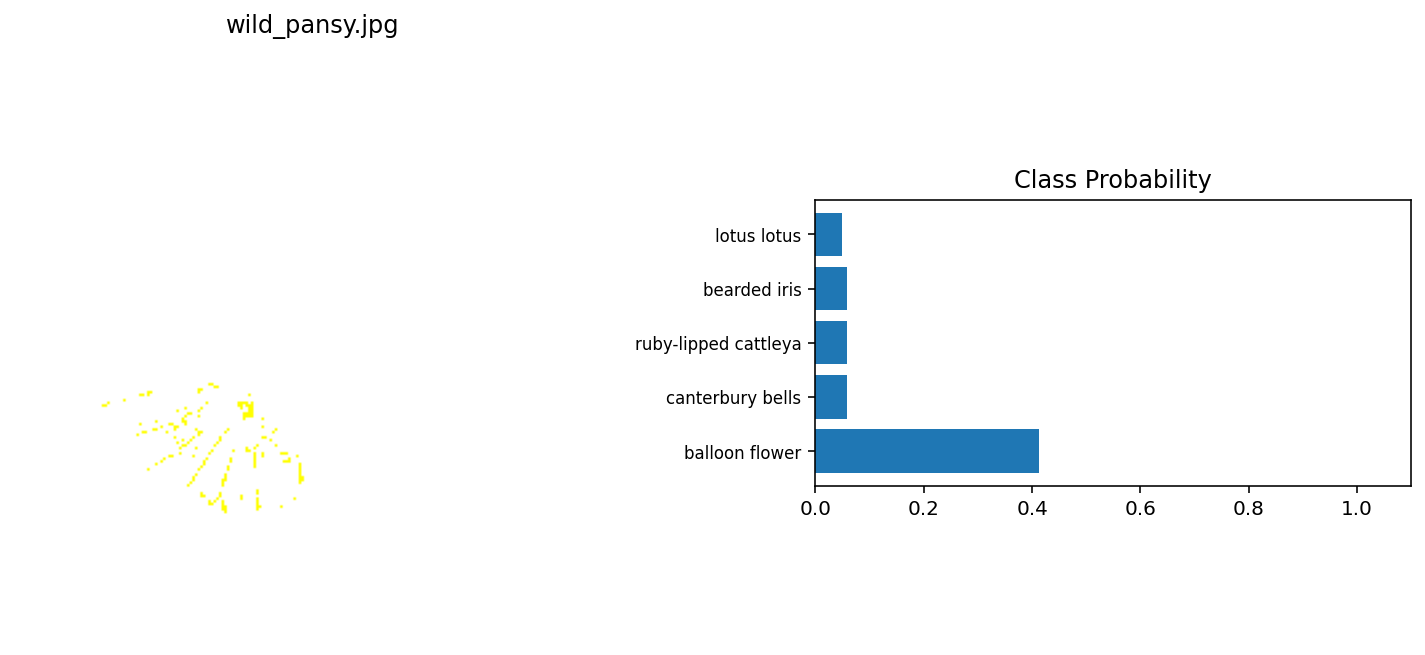

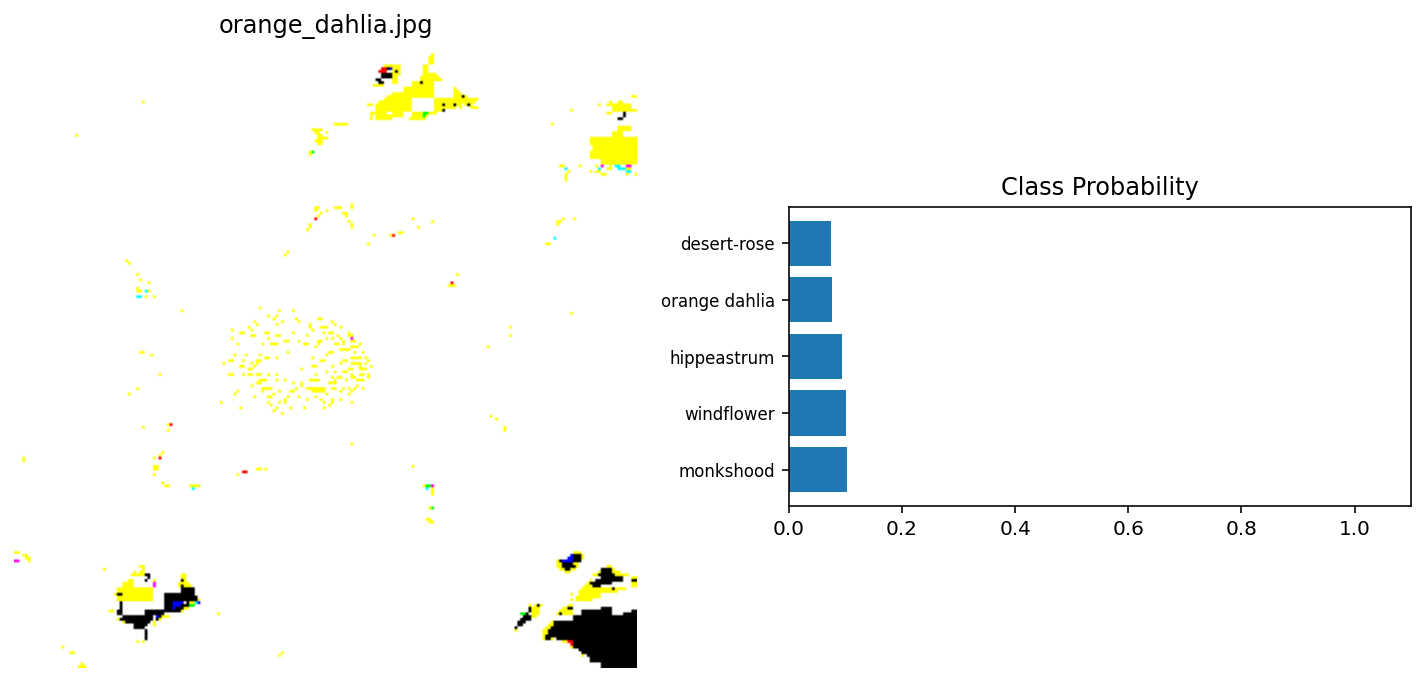

In [27]:
import os

top_k2 = 5


dir_path = './test_images/'
for img_filename in os.listdir(dir_path):
    ps, classes, img = predict(dir_path + img_filename, reloaded_model, top_k2)
    labels =[]
    for l in classes:
        labels.append(class_names[str(l+1)]) 

    
    fig, (ax1, ax2) = plt.subplots(figsize=(10,9), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(img_filename)
    ax2.barh(np.arange(top_k2), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(top_k2))
    ax2.set_yticklabels(labels, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()